# PROJET de Spécialisation #2  
# ‘’SUPPLY CHAIN’’ : COMPLEMENTS

==========================================================================================================================================================

# Questions Clés et Axes d'Analyse sur la base du contexte business et des objectifs :

1. Quels sont les produits les plus vendus et les plus rentables ? 
2. Y a-t-il des problèmes de rupture de stock fréquents pour certains produits ou catégories ?
3. Quels sont les délais de livraison moyens et y a-t-il des variations significatives par transporteur ou région ?
4. Quels sont les principaux motifs de retours de produits ?
5. Y a-t-il des fournisseurs moins performants en termes de délais ou de fiabilité ?
6. Comment évoluent les niveaux de stock au fil du temps ?
7. Peut-on identifier des saisonnalités dans la demande ?
8. Y a-t-il des corrélations entre les caractéristiques des produits et les performances de la chaîne logistique ?


### Bibliothèque

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from graphviz import Digraph
import summarytools as st
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly import tools
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# 1. Compréhension des données

* Chargement des données

# Exploration et Préparation des Données
* Chargement et Inspection des Données

*Gestion des saisies incorrectes*

In [2]:
# Achats.csv
df_achat = pd.read_csv('dataset/achats V2.csv', sep=';', encoding='ISO-8859-1')
df_achat.head()


,ï»¿id_achat,date_achat,id_produit,quantite,id_fournisseur,prix_unitaire,delai_livraison_jours
0,PO000001,22/03/2024,P00627,150,S029,129.62,14
1,PO000002,12/06/2024,P00469,50,S028,110.81,8
2,PO000003,19/01/2024,P00849,75,S001,140.58,8
3,PO000004,20/11/2024,P00484,500,S028,120.77,9
4,PO000005,07/06/2024,P00196,50,S025,256.05,13


In [3]:
# Renommer les colonnes pour faciliter la manipulation
# Achats
df_achat.rename(columns={'quantité': 'quantite'}, inplace=True)
df_achat.rename(columns={'délai_livraison_jours': 'delai_livraison_jours'}, inplace=True)

In [4]:
#statistique descriptives
st.dfSummary(df_achat)


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ï»¿id_achat[object],1. PO0099842. PO0099833. PO0099824. PO0099815. PO0099806. PO0099797. PO0099788. PO0099779. PO00997610. PO00997511. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)9,990 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAyZJREFUeJzt3D1qAlEYRuF7RfLTKGHAJSR7cBFps/fswiY/lcEiWzgDzvNU6WaKQz4EX+f1eh1Q2CVPAbFREhsZsZERGxmxkREbGbGRERsZsZHZzTnf5pxP3SPZ8n+21zHG49ovwv1zRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNNLbPMcZv90i2avoVIyrOKBmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjDNKRmxkDF7IGLyQcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjDNKRmxkDF7IGLyQcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjDNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZOYY43mM8dA9kq3aL8vyfjgcXtZ+Ee7f/hba+Xz+Ph6PP2u/DPfrcrk87W9/3EI7nU5fa78Q980HBDJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjL7/69/dI9ki26NzWVZPnx5koKvhZOxriLjAwIZsZERGxmxkREbGbGRERsZsZERG6PyB2PnS4LP+4TaAAAAAElFTkSuQmCC"">",0(0.0%)
2,date_achat[object],1. 03/08/20242. 25/09/20243. 16/09/20244. 18/04/20245. 11/04/20246. 18/05/20247. 01/12/20248. 31/08/20249. 29/12/202410. 12/07/202411. other,"43 (0.4%)39 (0.4%)38 (0.4%)38 (0.4%)37 (0.4%)37 (0.4%)37 (0.4%)37 (0.4%)37 (0.4%)37 (0.4%)9,620 (96.2%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA21JREFUeJzt3EFqE2EAhuGZEkQ3CSWQw+QQHtZD5DZBkoWVbkb+EBfWKgjpKzTPA0p24+JlMhn+z3lZlgkKD8lVQGyUxEZGbGTERkZsZMRGRmxkxEZmnqbp0/iwLMtTd1nu0Wq73X4eH+Z5/iI43tLDer1+HH+mafrwplfi7nlmIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyq/P5/PX6+bm7LPfIBoHM7L/MouLORsa6iox1FRmvPsiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kHEsnIzBCxl3NjIGL2QMXsh49UFGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYxj4WQMXsh4ZiPja5SMdRUZ6yoyntnIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5FxLJyMdRUZdzYyBi9kDF7IePVBRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMY+FkDF7IuLORMXghY/BCxqsPMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNjXUXGBoGMdRUZdzYy1lVkrKvIePVBRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMY+FkDF7IuLORMXghY/BCxqsPMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kHAsnY/BCxjMbGV+jZKyryFhXkfHMRkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxrqKjGPhZKyryLizkTF4IWPwQsarDzJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZBwLJ2PwQn5ncyScW3p+7ZvyMni5bhDgJsbvgNcGVKsR2n6/f9psNt9vcynu2el0+ng4HB6Px+P4tvw1tvHXCG232337b/9C3pvLj86XvGcjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjs/p5LKS7JO/Z31q6DF7G+aM/HQuBf3UdUf02oHIsnOxYuMELGT8QyIiNjNjIiI2M2MiIjYzYyIiNjNiYKj8ACLkQJ5UnINsAAAAASUVORK5CYII="">",0(0.0%)
3,id_produit[object],1. P004822. P005293. P002304. P006785. P006266. P005877. P002768. P008759. P0002910. P0088111. other,"22 (0.2%)21 (0.2%)20 (0.2%)20 (0.2%)20 (0.2%)20 (0.2%)19 (0.2%)19 (0.2%)19 (0.2%)18 (0.2%)9,802 (98.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA1xJREFUeJzt3EFqU2EYhtH/L0HrJKEEsgTdQxfhYl1EFuEegiQDo06u3IIgjuUJJOeMSic3g4d+Ldy3c1mWAYWn5CkgNkpiIyM2MmIjIzYyYiMjNjJiIyM2Mk9zzk9zzufukTzyT7aPY4z3t/4g3D9nlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNhIY/s6xvjZPZJHNf0XIyrOKBmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNj

In [5]:
# commandes.csv
df_commandes = pd.read_csv('dataset/commandes V2.csv', sep=';', encoding='ISO-8859-1')
df_commandes.head()

,ï»¿id_commande,date_commande,id_produit,quantite,entrepot,statut
0,O000001,2024-09-03,P00413,2,Marseille,LivrÃ©
1,O000002,2024-11-09,P00778,15,Lyon,ExpÃ©diÃ©
2,O000004,2024-11-03,P00535,8,Lyon,LivrÃ©
3,O000006,2024-01-24,P00898,3,Paris,LivrÃ©
4,O000007,2024-02-15,P00445,1,Lyon,LivrÃ©


In [6]:
# Renommer les colonnes pour faciliter la manipulation
# Commandes
df_commandes.rename(columns={'quantité': 'quantite'}, inplace=True)
df_commandes.rename(columns={'entrepôt': 'entrepot'}, inplace=True)

In [7]:
# Statistiques descriptives
st.dfSummary(df_commandes)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ï»¿id_commande[object],1. O0500002. O0000013. O0000024. O0000045. O0499846. O0499837. O0499828. O0499819. O04997910. O04997811. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)42,394 (100.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAyZJREFUeJzt3D1qAlEYRuF7RfLTKGHAJSR7cBFps/fswiY/lcEiWzgDzvNU6WaKQz4EX+f1eh1Q2CVPAbFREhsZsZERGxmxkREbGbGRERsZsZHZzTnf5pxP3SPZ8n+21zHG49ovwv1zRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNNLbPMcZv90i2avoVIyrOKBmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjDNKRmxkDF7IGLyQcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjDNKRmxkDF7IGLyQcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjDNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZOYY43mM8dA9kq3aL8vyfjgcXtZ+Ee7f/hba+Xz+Ph6PP2u/DPfrcrk87W9/3EI7nU5fa78Q980HBDJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjL7/69/dI9ki26NzWVZPnx5koKvhZOxriLjAwIZsZERGxmxkREbGbGRERsZsZERG6PyB2PnS4LP+4TaAAAAAElFTkSuQmCC"">",0(0.0%)
2,date_commande[object],1. 2024-12-172. 2024-12-233. 2024-12-224. 2024-12-135. 2024-12-156. 2024-12-267. 2024-12-288. 2024-12-259. 2024-12-0810. 2024-12-0411. other,"391 (0.9%)383 (0.9%)379 (0.9%)373 (0.9%)372 (0.9%)370 (0.9%)367 (0.9%)352 (0.8%)351 (0.8%)350 (0.8%)38,716 (91.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA2tJREFUeJzt3EFq21AARVEpmNJObILBi/EiutguwrsxxR4kIRMVuencCvhCqnMgxTNlcJEV8V/HaZoGKDwlVwGxURIbGbGRERsZsZERGxmxkREbmXEYhh/zh2maXrvLskab/X7/c/4wjuMvwfFIT9vt9nn+GYbh20OvxOp5ZiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2Mpvr9fr74/N7d1nWyAaBzOi/zKLizkbGuoqMdRUZrz7IiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJBxLJyMwQsZdzYyBi9kDF7IePVBRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMY+FkDF7IeGYj42uUjHUVGesqMp7ZyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRcSycjHUVGXc2MgYvZAxeyHj1QUZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxuCFjGPhZAxeyLizkTF4IWPwQsarDzJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxgaBjHUVGXc2MtZVZKyryHj1QUZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxuCFjGPhZAxeyLizkTF4IWPwQsarDzJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZBwLJ2PwQsYzGxlfo2Ssq8hYV5HxzEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6ioxj4WSsq8i4s5ExeCFj8ELGqw8yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QcCydj8EJ+Z3MknKXel34b3gYvHxsEuNv8rL90JLWZQzsej6+73e7t/kuxZpfL5fvpdHo+n8/zN+L9sc3/zKEdDoeXh/6G/G9uf1gu4T0bGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbmc2/IyPdJfnqPtvLbfAyn036zJER1uv6dyi1aCTlWDjZsXCDFzL+QCAjNjJiIyM2MmIjIzYyYiMjNjJiY6j8AdsKECfG4BciAAAAAElFTkSuQmCC"">",0(0.0%)
3,id_produit[object],1. P006202. P009813. P003704. P001435. P006716. P001827. P007808. P006919. P0054110. P0053211. other,"227 (0.5%)208 (0.5%)206 (0.5%)195 (0.5%)195 (0.5%)194 (0.5%)194 (0.5%)194 (0.5%)193 (0.5%)193 (0.5%)40,405 (95.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA2xJREFUeJzt3EFqE2EAhuGZEkQ3CSWQw+QQHtZD5DZBkoWVbkb+EFe2KrR9C83zgJLduHiZTIb/c16WZYLCXXIVEBslsZERGxmxkREbGbGRERsZsZGZp2n6Mj4sy/LQXZZbtNput1/Hh3mevwmOt3S3Xq/vx59pmj696ZW4eZ7ZyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3M6nw+f79+fuwuyy2yQS

In [8]:
# expédition.csv


df_expedition = pd.read_csv('dataset/expeditions V2.csv', sep=';', encoding='ISO-8859-1')
df_expedition.head()

,ï»¿id_expedition,id_commande,id_produit,quantite,entrepot,date_expedition,date_livraison,transporteur,cout_transport,delai_livraison
0,SHP000001,O000001,P00413,2,Marseille,2024-09-09,2024-09-15,UPS,11.62,6
1,SHP000002,O000002,P00778,15,Lyon,2024-11-16,2024-11-23,Chronopost,13.61,7
2,SHP000003,O000004,P00535,8,Lyon,2024-11-06,2024-11-09,FedEx,19.32,3
3,SHP000004,O000006,P00898,3,Paris,2024-01-26,2024-01-28,DHL,14.79,2
4,SHP000005,O000007,P00445,1,Lyon,2024-02-18,2024-02-21,FedEx,13.56,3


In [9]:
# Expéditions
df_expedition.rename(columns={'quantité': 'quantite'}, inplace=True)
df_expedition.rename(columns={'entrepôt': 'entrepot'}, inplace=True)

In [10]:
# Statistiques descriptives
st.dfSummary(df_expedition)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ï»¿id_expedition[object],1. SHP0424042. SHP0000013. SHP0000024. SHP0000035. SHP0423886. SHP0423877. SHP0423868. SHP0423859. SHP04238410. SHP04238311. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)42,394 (100.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAyZJREFUeJzt3D1qAlEYRuF7RfLTKGHAJSR7cBFps/fswiY/lcEiWzgDzvNU6WaKQz4EX+f1eh1Q2CVPAbFREhsZsZERGxmxkREbGbGRERsZsZHZzTnf5pxP3SPZ8n+21zHG49ovwv1zRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNNLbPMcZv90i2avoVIyrOKBmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjDNKRmxkDF7IGLyQcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjDNKRmxkDF7IGLyQcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjDNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZOYY43mM8dA9kq3aL8vyfjgcXtZ+Ee7f/hba+Xz+Ph6PP2u/DPfrcrk87W9/3EI7nU5fa78Q980HBDJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjL7/69/dI9ki26NzWVZPnx5koKvhZOxriLjAwIZsZERGxmxkREbGbGRERsZsZERG6PyB2PnS4LP+4TaAAAAAElFTkSuQmCC"">",0(0.0%)
2,id_commande[object],1. O0500002. O0000013. O0000024. O0000045. O0499846. O0499837. O0499828. O0499819. O04997910. O04997811. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)42,394 (100.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAyZJREFUeJzt3D1qAlEYRuF7RfLTKGHAJSR7cBFps/fswiY/lcEiWzgDzvNU6WaKQz4EX+f1eh1Q2CVPAbFREhsZsZERGxmxkREbGbGRERsZsZHZzTnf5pxP3SPZ8n+21zHG49ovwv1zRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNNLbPMcZv90i2avoVIyrOKBmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjDNKRmxkDF7IGLyQcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjDNKRmxkDF7IGLyQcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjDNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZOYY43mM8dA9kq3aL8vyfjgcXtZ+Ee7f/hba+Xz+Ph6PP2u/DPfrcrk87W9/3EI7nU5fa78Q980HBDJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjL7/69/dI9ki26NzWVZPnx5koKvhZOxriLjAwIZsZERGxmxkREbGbGRERsZsZERG6PyB2PnS4LP+4TaAAAAAElFTkSuQmCC"">",0(0.0%)
3,id_produit[object],1. P006202. P009813. P003704. P001435. P006716. P001827. P007808. P006919. P0054110. P0053211. other,"227 (0.5%)208 (0.5%)206 (0.5%)195 (0.5%)195 (0.5%)194 (0.5%)194 (0.5%)194 (0.5%)193 (0.5%)193 (0.5%)40,405 (95.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA2xJREFUeJzt3EFqE2EAhuGZEkQ3CSWQw+QQHtZD5DZBkoWVbkb+EFe2KrR9C83zgJLduHiZTIb/c16WZYLCXXIVEBslsZERGxmxkREbGbGRERsZsZGZp2n6Mj4sy/LQXZZbtNput1/Hh3mevwmOt3S3Xq/vx59pmj696ZW4eZ7ZyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3M6nw+f79+fuwuyy2yQSAz+y+zqLizkbGuImNdRcarDzJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZBwLJ2PwQsadjYzBCxmDFzJefZARGxmxkREbGbGRERsZsZE

In [ ]:
# fournisseurs.csv


df_fournisseurs = pd.read_csv('dataset/fournisseurs V2.csv', sep=';', encoding='ISO-8859-1')
df_fournisseurs.head()

,ï»¿id_fournisseur,nom_fournisseur,ville,pays,fiabilite,delai_moyen_jours
0,S001,Lecomte et Fils,Zurich,Suisse,0.84,10
1,S002,Morvan,Paris,France,0.86,9
2,S003,Germain et Fils,Amsterdam,Pays-Bas,0.85,10
3,S004,Philippe,Rome,Italie,0.57,9
4,S005,Blanc,Dublin,Irlande,0.65,13


In [12]:
#fournisseurs
df_fournisseurs.rename(columns={'fiabilitÃ©': 'fiabilite'}, inplace=True)
df_fournisseurs.rename(columns={'dÃ©lai_moyen_jours': 'delai_moyen_jours'}, inplace=True)

In [13]:
# Statistiques descriptives
st.dfSummary(df_fournisseurs)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ï»¿id_fournisseur[object],1. S0012. S0023. S0034. S0045. S0056. S0067. S0078. S0089. S00910. S01011. other,1 (2.0%)1 (2.0%)1 (2.0%)1 (2.0%)1 (2.0%)1 (2.0%)1 (2.0%)1 (2.0%)1 (2.0%)1 (2.0%)40 (80.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA4NJREFUeJzt3EFq21AARVEpmJJObIrBi/EiutguwrsxRR40xRMVgVPSeXMF1jmQgEcu9CIh8V/GeZ4HKLwk3wJioyQ2MmIjIzYyYiMjNjJiIyM2MuMwDF+HYfjy+Hyf5/mt+3q2ZHc8Hr/v9/tvy4fb7fZzHMcfguMzvCyhnc/nt+XnEd37VQ7+q93y63A4/H58Xm6p8Ck8IJARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG+0Ro2maXruvZKt2y+ncy+Xy96TucjR87X8Uz8kGgczoT2ZRcWUjY11FxrqKjHUVGS91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeNYOBmDFzKubGQMXsgYvJAxeCHjpS4ZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9kHAsnY/BCxgMCGbdRMtZVZKyryFhXkfGAQEZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRnHwslYV5FxZSNj8ELG4IWMwQsZL3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQMXgh41g4GYMXMq5sZAxeyBi8kDF4IeOlLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbGuImNdRcYGgYx1FRlXNjLWVWSsq8hYV5HxUpeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyjoWTMXgh48pGxuCFjMELGYMXMl7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsaxcDIGL2Q8IJBxGyVjXUXGuoqMdRUZDwhkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkrKvIWFeRcSycjHUVGVc2MgYvZAxeyBi8kPFSl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzKOhZMxeGG1KxvP777W3eufwQvP77biqGn3Pnj5sEPgSU3T9Lo8DF6v1+VO1se2/FpCO51Ov+ovZxWrjZq81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNj8LIh08r/zx8HL/6e7gbcVhw1ORa+Pfe1joUbvJDxgEBGbGTERkZsZMRGRmxkxEZGbGTExlD5A37f0x0zeR1CAAAAAElFTkSuQmCC"">",0(0.0%)
2,nom_fournisseur[object],1. Lecomte et Fils2. Morvan3. Germain et Fils4. Philippe5. Blanc6. Jean7. Carlier8. Gaillard S.A.9. Fischer10. Pelletier11. other,1 (2.0%)1 (2.0%)1 (2.0%)1 (2.0%)1 (2.0%)1 (2.0%)1 (2.0%)1 (2.0%)1 (2.0%)1 (2.0%)40 (80.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA4NJREFUeJzt3EFq21AARVEpmJJObIrBi/EiutguwrsxRR40xRMVgVPSeXMF1jmQgEcu9CIh8V/GeZ4HKLwk3wJioyQ2MmIjIzYyYiMjNjJiIyM2MuMwDF+HYfjy+Hyf5/mt+3q2ZHc8Hr/v9/tvy4fb7fZzHMcfguMzvCyhnc/nt+XnEd37VQ7+q93y63A4/H58Xm6p8Ck8IJARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG+0Ro2maXruvZKt2y+ncy+Xy96TucjR87X8Uz8kGgczoT2ZRcWUjY11FxrqKjHUVGS91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeNYOBmDFzKubGQMXsgYvJAxeCHjpS4ZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9kHAsnY/BCxgMCGbdRMtZVZKyryFhXkfGAQEZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRnHwslYV5FxZSNj8ELG4IWMwQsZL3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQMXgh41g4GYMXMq5sZAxeyBi8kDF4IeOlLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbGuImNdRcYGgYx1FRlXNjLWVWSsq8hYV5HxUpeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyjoWTMXgh48pGxuCFjMELGYMXMl7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsaxcDIGL2Q8IJBxGyVjXUXGuoqMdRUZDwhkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkrKvIWFeRcSycjHUVGVc2MgYvZAxeyBi8kPFSl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzKOhZMxeGG1KxvP777W3eufwQvP77biqGn3Pnj5sEPgSU3T9Lo8DF6v1+VO1se2/FpCO51Ov+ovZxWrjZq81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNj8LIh08r/zx8HL/6e7gbcVhw1ORa+Pfe1joUbvJDxgEBGbGTERkZsZMRGRmxkxEZGbGTExlD5A37f0x0zeR1CAAAAAElFTkSuQmCC"">",0(0.0%)
3,ville[object],1. Rome2. Berlin3. Paris4. Dublin5. Zurich6. Copenhague7. Stockholm8. Helsinki9. Amsterdam10. Oslo11. other,6 (12.0%)5 (10.0%)5 (10.0%)4 (8.0%)4 (8.0%)4 (8.0%)4 (8.0%)3 (6.0%)3 (6.0%)3 (6.0%)9 (18.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA6FJREFUeJzt3EGKGlEARdEySEgmSiO4GBeRxWYR7kYaHaRDJhVqnIZI+7nYes4gw0oGly9V/JfVPM8TFL4kfwuIjZLYyIiNjNjIiI2M2MiIjYzYyKymafo+TdPXQc/7M8/z26Bn8WDWu93ux2azeRnxsMvl8rparX4Kjvesl9AOh8Pbd

In [14]:
# Produits.csv


df_produits = pd.read_csv('dataset/produits V2.csv', sep=';', encoding='ISO-8859-1')
df_produits.head()

,ï»¿id_produit,categorie,marque,prix,stock_minimum
0,P00001,Soins capillaires,Luxe eclat,467.42,52
1,P00002,Accessoires,Maison Pure,291.26,10
2,P00003,Maquillage,Essentielle Paris,354.39,60
3,P00004,Accessoires,Reflet d'or,462.80,33
4,P00005,Accessoires,EÂlixir Haute BeautÃ©,359.47,33


In [15]:
# Produits
df_produits.rename(columns={'ï»¿id_produit': 'id_produit'}, inplace=True)
df_produits.rename(columns={'catÃ©gorie': 'categorie'}, inplace=True)

In [16]:
# Statistiques descriptives
st.dfSummary(df_produits)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id_produit[object],1. P010002. P000013. P000024. P000035. P000046. P000057. P000068. P000079. P0098410. P0098311. other,1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)990 (99.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA1JJREFUeJzt3MFpG1EYRtH3jHCcjYQRqISkBxWRYlOEikgPIkiLOMlmwiwMLiBcgXTO0pvR4uLfgvk8l2UZUHhKngJioyQ2MmIjIzYyYiMjNjJiIyM2MmIj8zTn/DrnfOkeySP/Zvsyxvh06w/C/XNGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI00th9jjD/dI3lU038xouKMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkTF4IWPwQsYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbGuoqMdRUZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkTF4IWPwQsYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjDNKRmxkxEbGuoqMdRUZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYx1FRnrKjLOKBmxkTF4IWPwQsYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjDNKZo4xPo8xnrtH8oD+Lsvyttnv99+22+3rrT8N9+t6vf6cc37frKEdj8e33W73+9YfivtzuVxeTqfT6/l8ft6sP1hDOxwOv279wbhb659qviDQERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGR2by/BtI9kkfysa3N+mLb+r7R+2sg8L+tja1v63otnOy1cOsqMr4gkBEbGbGRERsZsZERGxmxkREbGbExKv8AwgdpOXa5aM0AAAAASUVORK5CYII="">",0(0.0%)
2,categorie[object],1. Soins de la peau2. Soins capillaires3. Accessoires4. Maquillage5. Parfums,210 (21.0%)206 (20.6%)204 (20.4%)190 (19.0%)190 (19.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAftJREFUeJzt2zGK21AARVEpmJA0NoPBi/Eistgswrsxg13MDGkUtIjcH/zPKdxKxUVC5r9127YFCt+Sq4DYKImNzLosy89lWb4vY/3Ztu1z8D3wjx3O5/Ov4/H4tgz0fD7f13X9LbjXdthDu16vn6fT6WvEDTwejx+32+3tfr/vT1exvbDD/rOHdrlcPgbex/4q58X5QCAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYqM99bEf81kGGXltWof94OJ+nmzkMZ/9HvbTuqOuT8OxcDKr3SgVHwhM9Rr1Cp3E8HWVZdU8hq6rLKvm8j+sqyyrJuEDgYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjTnWVZZVcxm+rrKsmodj4WSsq8j4QCDjNUrGuoqMdRUZ6yoyPhDIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i41g4GesqXv7J5mk2oSGDFyOXOeWDFyOXeY0avBi5TMifumTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTExuuuqyyq5jVkXWVRNScbBDLWVWQ82chYV5GxriJjXUXGn7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbGuoqMdRUZGwQy1lVkfCCQERtL5S/HMQ43WxKnMAAAAABJRU5ErkJggg=="">",0(0.0%)
3,marque[object],1. Luxe eclat2. Maison Pure3. Essentielle Paris4. Reflet d'or5. EÂlixir Haute BeautÃ©6. ClartÃ© Botanique7. Atelier MinÃ©ral8. Silhouette Paris9. Natura Solaire10. Les Essences Rares11. other,100 (10.0%)100 (10.0%)100 (10.0%)100 (10.0%)100 (10.0%)20 (2.0%)20 (2.0%)20 (2.0%)20 (2.0%)20 (2.0%)400 (40.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA6RJREFUeJzt3EFqU1EAhtGXEkQnCSWQxWQRLtZFZDdBkkErTiIXWnBkMW2+aN45oOCgtYWPW9/j/i7O5/MEhYfkbwGxURIbGbGRERsZsZERGxmxkREbmcU0TV+mafr0js/x83w+P3/g18SdWm42m6+r1erx0k9wOp2+LxaLb4LjLcsR2m63e16v1z+mv3Q8Hj/v9/vHw+EwTkax8UfL8dsIbbvdPk2XGT+G4U0eEMiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjfaK0biXdskHX/pxzNNy3LQdFyAvvZc2Pn5cDf/4L417Y4NAZuG/zKLiZCNjXUXGuoqMdRUZL3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQMXgh41o4GYMXMk42MgYvZAxeyBi8kPFSl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzKuhZMxeCHjAYGMH6NkrKvIWFeRsa4i4wGBjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjHUVGesqMq6Fk7GuIuNkI2PwQsbghYzBCxkvdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjWjgZgxdudrI5pWgGL8YrXNPD6+Bl/HqJ7j3/foO3By8vfzZe4Wq81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMj

In [17]:
# retours.csv

df_retours = pd.read_csv('dataset/retours V2.csv', sep=';', encoding='ISO-8859-1')
df_retours.head()

,ï»¿id_commande,id_produit,date_retour,motif
0,O026807,P00184,2024-09-12,Client insatisfait
1,O008302,P00063,2024-12-15,Livraison incomplÃ¨te
2,O045235,P00158,2024-04-12,Livraison incomplÃ¨te
3,O001001,P00136,2024-11-18,Livraison incomplÃ¨te
4,O005871,P00258,2024-11-29,Mauvaise rÃ©fÃ©rence


In [18]:
# Retours
df_retours.rename(columns={'quantité': 'quantite'}, inplace=True)
df_retours.rename(columns={'entrepôt': 'entrepot'}, inplace=True)


In [19]:
# Statistiques descriptives
st.dfSummary(df_retours)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ï»¿id_commande[object],1. O0358672. O0062543. O0134364. O0042585. O0489356. O0287147. O0270248. O0270949. O02185610. O03606511. other,"2 (0.1%)2 (0.1%)2 (0.1%)2 (0.1%)2 (0.1%)2 (0.1%)2 (0.1%)2 (0.1%)2 (0.1%)2 (0.1%)2,967 (99.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAzhJREFUeJzt3LFtIlEYRtH3LOTFCcgaiRJ2e6AIp+6YItyEBYG9S8KKwC1cJDgnczQTXPmXpfk8L5fLgMJT8hQQGyWxkREbGbGRERsZsZERGxmxkREbmac5558557p7JI/8m+33GOPXrV+E++eMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERtpbB9jjH/dI3lU038xouKMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkTF4IWPwQsYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbGuoqMdRUZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkTF4IWPwQsYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjDNKRmxkxEbGuoqMdRUZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYx1FRnrKjLOKBmxkTF4IWPwQsYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjDNKZo4xXsYYz90jeVDn1bIsb5vN5vXWb8J9O51On6traPv9/nu73f699Qtxn47H4/pwOLyurj9cQ9vtdl+3finu2os/EMiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2Misfj4B6R7Jo/npay7L8u7jSYqPJ30WTuVsXUXGHwhkxEZGbGTERkZsZMRGRmxkxEZGbIzKf0WpV2xeyLPPAAAAAElFTkSuQmCC"">",0(0.0%)
2,id_produit[object],1. P003792. P009213. P003574. P005165. P004036. P006207. P000118. P007679. P0097110. P0095211. other,"30 (1.0%)29 (1.0%)29 (1.0%)27 (0.9%)27 (0.9%)27 (0.9%)26 (0.9%)25 (0.8%)24 (0.8%)24 (0.8%)2,719 (91.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA59JREFUeJzt3EFOU1EAhtHbplE7gRASlsECuggX6yJYAPsghg6sMqm5pcapxfQz0nMG4ETK4Mt77cv9Wez3+wGFZfIqIDZKYiMjNjJiIyM2MmIjIzYyYiOzGGOsxxgfxhgv+/1+1700l2Z1e3v7+erq6ma73X5dLBZfBMe5LGdo9/f3Y34/XuHgfO/Z1uv1j/P8ePjNBwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYqONbbfbfexekku1nCd0Hx8fx/w+j4b/61+I98sGgczCn8yi4spGxrqKjHUVGesqMh7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsaxcDIGL2Rc2cgYvJAxeCFj8ELGQ10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOBZOxuCFjA8I5LfR4RZKsq6a/7CsIllXWVZR8J6NjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3M6riqmiyrOCvHwslYV5FxZSNj8ELG4IWMRx9kxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsg4Fk7G4IWMKxsZgxcyBi9kPPogIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWRsEMhYV5FxZSNjXUXGuoqMRx9kxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsg4Fk7G4IWMKxsZgxcyBi9kPPogIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNj8ELGsXAyBi9kvGcj4zZKxrqKjHUVGe/ZyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRcSycjHUVGVc2MgYvZAxeyHj0QUZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxuCFjGPhZAxeyK9sjoRzipe33AkPg5fjBgH+yHyf/5aB1GqGttlsdtfX199P+Y9cpufn508PDw83T09P8254Wmzzywzt7u7u29l+Q96bw4fKU3nORkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERmb169hI95L8z/6mlcPgZZ5PeuuxES7P9nUkdfJAyrFwsmPhBi9kfEAgIzYyYiMjNjJiIyM2MmIjIzYyYmNUfgJUN0Jw81JfNgAAAABJRU5ErkJggg=="">",0(0.0%)
3,date_retour[object],1. 2025-01-032. 2025-01-023. 2024-12-234. 2024-12-225. 2024-12-316. 2024-12-187. 2025-01-088. 2025-01-019. 2024-12-2610. 2025-01-0711. other,"35 (1.2%)33 (1.1%)30 (1.0%)28 (0.9%)28 (0.9%)27 (0.9%)26 (0.9%)26 (0.9%)26 (0.9%)26 (0.9%)2,702 (90.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA55JREFUeJzt3EFOU1EAhtFb0qidQAgJy2ABLMLFuggW0H0Q0w6sMqm5UONQKelnpOcMwAmUwZf32pf7u9jv9wMKF8mrgNgoiY2M2MiIjYzYyIiNjNjIiI3MYoyxGmN8GGM87ff7XffSnJvlzc3N58vLy+vtdvt1sVh8ERyncjFD

In [20]:
# Stocks.csv


df_stocks = pd.read_csv('dataset/stocks V2.csv', sep=';', encoding='ISO-8859-1')
df_stocks.head()

,ï»¿date,id_produit,entrepot,niveau_stock
0,01/06/2024,P00001,Lyon,88
1,22/04/2024,P00001,Paris,141
2,25/09/2024,P00002,Lyon,286
3,18/02/2024,P00003,Paris,177
4,13/07/2024,P00003,Lyon,95


In [21]:
# Stocks
df_stocks.rename(columns={'entrepÃ´t': 'entrepot'}, inplace=True)
df_stocks.rename(columns={'ï»¿date': 'date'}, inplace=True)

In [22]:
# Statistiques descriptives
st.dfSummary(df_stocks)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,date[object],1. 23/10/20242. 15/10/20243. 13/07/20244. 06/09/20245. 17/06/20246. 10/10/20247. 08/10/20248. 22/04/20249. 27/06/202410. 12/04/202411. other,"13 (0.8%)11 (0.6%)11 (0.6%)10 (0.6%)10 (0.6%)10 (0.6%)10 (0.6%)10 (0.6%)9 (0.5%)9 (0.5%)1,603 (94.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA2tJREFUeJzt3D1qG1EARtEZI0zSSBiBFqNFZLFZhHYjglTExs2EJ5TSP9j4FtY54KBuXFxG4+F9mZdlmaBwl1wFxEZJbGTERkZsZMRGRmxkxEZGbGTmaZp+jg/Lsjx2l+UWrbbb7a/xYZ7n34LjK92t1+uH8TNN0/2XXomb55mNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2Miszufzn+vn5+6y3CIbBDKz/zKLijsbGesqMtZVZLz6ICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxrFwMgYvZNzZyBi8kDF4IePVBxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMo6FkzF4IeOZjYyvUTLWVWSsq8h4ZiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRcaxcDLWVWTc2cgYvJAxeCHj1QcZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmDFzKOhZMxeCHjzkbG4IWMwQsZrz7IiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYx1FRkbBDLWVWTc2chYV5GxriLj1QcZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmDFzKOhZMxeCHjzkbG4IWMwQsZrz7IiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJBxLJyMwQsZz2xkfI2Ssa4iY11FxjMbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoyjoWTsa4i485GxuCFjMELGa8+yIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQcSycjMEL+Z3NkXA+6/mtb8fL4OW6QYAPG8/+b42mViO0/X7/uNlsnj5+KW7Z6XT6cTgcHo7H4/iGfDm28c8Ibbfb/U1/Q76byx+ar/GejYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjczq/xGR7pJ8N+/t5zJ4GWeR3nNEBF5yHU69OppyLJzsWLjBCxl/IJARGxmxkREbGbGRERsZsZERGxmxMVX+Aav8ECdyt3lPAAAAAElFTkSuQmCC"">",0(0.0%)
2,id_produit[object],1. P002902. P008243. P000644. P002605. P001546. P003557. P008848. P008389. P0022210. P0016111. other,"3 (0.2%)3 (0.2%)3 (0.2%)3 (0.2%)3 (0.2%)3 (0.2%)3 (0.2%)3 (0.2%)3 (0.2%)3 (0.2%)1,676 (98.2%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA1xJREFUeJzt3EFqU2EYhtH/L0HrJKEEsgTdQxfhYl1EFuEegiQDo06u3IIgjuUJJOeMSic3g4d+Ldy3c1mWAYWn5CkgNkpiIyM2MmIjIzYyYiMjNjJiIyM2Mk9zzk9zzufukTzyT7aPY4z3t/4g3D9nlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNhIY/s6xvjZPZJHNf0XIyrOKBmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjDNKRmxkDF7IGLyQcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjDNKRmxkDF7IGLyQcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjDNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZOYY48MY4133SB7Mr2VZrusXm/1+/3m73b7c+hNxny6Xy7c555c1uM0a2uvr63W32/249QfjvpzP5+fj8fhyOp3Wy3ndrN9cQzscDt9v/eG4S+uvaW/8gUBGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZm8+dVkO6RPIp/u9qsL7et7xz9/SoI/C9rX+vbuuvXXgsney3cuoqMPxDIiI2M2MiIjYzYyIiNjNjIiI2M2BiV3wr4biQ78PXLAAAAAElFTkSuQmCC"">",0(0.0%)
3,entrepot[object],1. Paris2. Lyon3. Marseille,797 (46.7%)576 (33.8%)333 (19.5%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAZJJREFUeJzt20FqwkAAheFJCaXdKCJ4GA/Rw/YQ3kaKLmrpJmX2hRYMb+Lk+xZdaio/amTeME1TgYSnyLNAKWUopbyWUp5bX8iCfU/TdGt9ET0Y9/v922az2bW+kKW6Xq8fwzC8C+5+Yw3teDzettvt1wyP15XL5fJyOp125/O5vvOL7U5j/VNDOxwOn/c+WKfq1wxm4AaBGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRG9kjRvXcVu4pH4fXZV5jPYlaDwg6t/W7+vrUo+Gtr6MHNgh/s0GYyWDKR0qP72zeiRaqu3WVNdRydbWusoZath7XVe6qF8qPusSIjRixESM2YsRGjNiIER

In [23]:
# Conversion des dates en format datetime
df_commandes['date_commande'] = pd.to_datetime(df_commandes['date_commande'], errors='coerce')
df_expedition['date_expedition'] = pd.to_datetime(df_expedition['date_expedition'], errors='coerce')
df_expedition['date_livraison'] = pd.to_datetime(df_expedition['date_livraison'], errors='coerce')
df_retours['date_retour'] = pd.to_datetime(df_retours['date_retour'], errors='coerce')
df_stocks['date'] = pd.to_datetime(df_stocks['date'], errors='coerce')


In [24]:
# Répartition des commandes par période
df_commandes['date_commande'] = pd.to_datetime(df_commandes['date_commande'])
df_commandes['mois'] = df_commandes['date_commande'].dt.to_period('M')
commandes_by_month = df_commandes.groupby('mois').size().reset_index(name='nombre_commandes')

commandes_by_month['mois'] = commandes_by_month['mois'].astype(str)

fig = px.bar(commandes_by_month, x='mois', y='nombre_commandes', 
             title="Répartition des commandes par période", 
             labels={'mois': 'Mois', 'nombre_commandes': 'Nombre de commandes'},
             text='nombre_commandes')

fig.update_layout(xaxis=dict(tickangle=45), 
                  xaxis_title="Mois", 
                  yaxis_title="Nombre de commandes", 
                  template="plotly_white")

fig.show()

In [25]:
#Distribution des produits par catégorie
product_distribution = df_produits['categorie'].value_counts().reset_index()
product_distribution.columns = ['categorie', 'nombre_produits']

fig = px.pie(product_distribution, 
             names='categorie', 
             values='nombre_produits', 
             title="Distribution des produits par catégorie",
             template="plotly_white")

fig.update_traces(textinfo='percent+label')
fig.show()

In [26]:
# Distribution des produits par catégorie
fig_category = px.pie(product_distribution, 
                      names='categorie', 
                      values='nombre_produits', 
                      title="Distribution des produits par catégorie",
                      template="plotly_white")
fig_category.update_traces(textinfo='percent+label')
fig_category.show()

# Distribution des produits par marque
product_by_brand = df_produits['marque'].value_counts().reset_index()
product_by_brand.columns = ['marque', 'nombre_produits']
fig_brand = px.bar(product_by_brand.head(10), 
                   x='marque', 
                   y='nombre_produits', 
                   title="Top 10 Marques par Nombre de Produits",
                   labels={'marque': 'Marque', 'nombre_produits': 'Nombre de Produits'},
                   template="plotly_white")
fig_brand.show()

# Distribution des prix des produits
fig_price = px.histogram(df_produits, 
                         x='prix', 
                         nbins=50, 
                         title="Distribution des Prix des Produits",
                         labels={'prix': 'Prix'},
                         template="plotly_white")
fig_price.update_layout(xaxis_title="Prix", yaxis_title="Nombre de Produits")
fig_price.show()

# Analyse de la demande client (commandes par mois)
fig_demand = px.bar(commandes_by_month, 
                    x='mois', 
                    y='nombre_commandes', 
                    title="Demande Client : Commandes par Mois",
                    labels={'mois': 'Mois', 'nombre_commandes': 'Nombre de Commandes'},
                    template="plotly_white")
fig_demand.update_layout(xaxis=dict(tickangle=45))
fig_demand.show()

# Taux de rupture de stock
stock_rupture = df_stocks[df_stocks['niveau_stock'] == 0].groupby('id_produit').size().reset_index(name='nombre_ruptures')
fig_stock_rupture = px.bar(stock_rupture.head(10), 
                           x='id_produit', 
                           y='nombre_ruptures', 
                           title="Top 10 Produits avec le Plus de Ruptures de Stock",
                           labels={'id_produit': 'ID Produit', 'nombre_ruptures': 'Nombre de Ruptures'},
                           template="plotly_white")
fig_stock_rupture.show()

# Retards de livraison
fig_delivery_delay = px.histogram(frequent_delays, 
                                  x='delai_livraison_jours', 
                                  nbins=30, 
                                  title="Distribution des Retards de Livraison",
                                  labels={'delai_livraison_jours': 'Retard (jours)'},
                                  template="plotly_white")
fig_delivery_delay.update_layout(xaxis_title="Retard (jours)", yaxis_title="Nombre d'Expéditions")
fig_delivery_delay.show()

# Fournisseurs les plus fiables
fig_supplier_reliability = px.bar(df_fournisseurs.sort_values(by='fiabilite', ascending=False).head(10), 
                                  x='nom_fournisseur', 
                                  y='fiabilite', 
                                  title="Top 10 Fournisseurs les Plus Fiables",
                                  labels={'nom_fournisseur': 'Fournisseur', 'fiabilite': 'Fiabilité'},
                                  template="plotly_white")
fig_supplier_reliability.show()

# Temps de livraison moyen par transporteur

avg_delivery_time = df_expedition.groupby('transporteur')['delai_livraison'].mean().reset_index()
fig_delivery_time = px.bar(avg_delivery_time, 
                               x='transporteur', 
                               y='delai_livraison', 
                               title="Temps de Livraison Moyen par Transporteur",
                               labels={'transporteur': 'Transporteur', 'delai_livraison': 'Temps Moyen (jours)'},
                               template="plotly_white")
fig_delivery_time.show()

# Coûts de transport par transporteur
avg_transport_cost = df_expedition.groupby('transporteur')['cout_transport'].mean().reset_index()
fig_transport_cost = px.bar(avg_transport_cost, 
                            x='transporteur', 
                            y='cout_transport', 
                            title="Coût Moyen de Transport par Transporteur",
                            labels={'transporteur': 'Transporteur', 'cout_transport': 'Coût Moyen (€)'},
                            template="plotly_white")
fig_transport_cost.show()

# Analyse des retours produits
return_reasons = df_retours['motif'].value_counts().reset_index()
return_reasons.columns = ['motif', 'nombre_retours']
fig_return_reasons = px.pie(return_reasons, 
                            names='motif', 
                            values='nombre_retours', 
                            title="Principales Causes des Retours Produits",
                            template="plotly_white")
fig_return_reasons.update_traces(textinfo='percent+label')
fig_return_reasons.show()

NameError: name 'frequent_delays' is not defined

In [ ]:
# Calculer le taux de service (commandes honorées sans rupture de stock)
total_commandes = len(df_commandes)
commandes_honorees = len(df_commandes[~df_commandes['id_produit'].isin(stock_rupture['id_produit'])])
taux_service = (commandes_honorees / total_commandes) * 100
print(f"Taux de service : {taux_service:.2f}%")

# Déterminer le délai moyen de réapprovisionnement des fournisseurs
delai_moyen_reapprovisionnement = df_fournisseurs['delai_moyen_jours'].mean()
print(f"Délai moyen de réapprovisionnement : {delai_moyen_reapprovisionnement:.2f} jours")

# Analyser la relation entre stock et demande (prévoir les ruptures)
stock_demande = df_stocks.groupby('id_produit')['niveau_stock'].mean().reset_index()
stock_demande = stock_demande.merge(df_commandes.groupby('id_produit')['quantite'].sum().reset_index(), on='id_produit', how='left')
stock_demande['ratio_stock_demande'] = stock_demande['niveau_stock'] / stock_demande['quantite']
stock_demande['rupture_probable'] = stock_demande['ratio_stock_demande'] < 1
print(stock_demande[['id_produit', 'ratio_stock_demande', 'rupture_probable']].head())

# Segmenter les fournisseurs selon leur fiabilité et délais
df_fournisseurs['segment'] = pd.cut(df_fournisseurs['fiabilite'], bins=[0, 0.6, 0.8, 1], labels=['Faible', 'Moyenne', 'Élevée'])
fournisseurs_segmentes = df_fournisseurs[['nom_fournisseur', 'fiabilite', 'delai_moyen_jours', 'segment']]
print(fournisseurs_segmentes.head())

Taux de service : 99.45%
Délai moyen de réapprovisionnement : 8.14 jours
  id_produit  ratio_stock_demande  rupture_probable
0     P00001             1.846774             False
1     P00002             0.305229              True
2     P00003             2.385965             False
3     P00004             0.450000              True
4     P00005             2.096774             False
   nom_fournisseur  fiabilite  delai_moyen_jours  segment
0  Lecomte et Fils       0.84                 10   Élevée
1           Morvan       0.86                  9   Élevée
2  Germain et Fils       0.85                 10   Élevée
3         Philippe       0.57                  9   Faible
4            Blanc       0.65                 13  Moyenne


In [ ]:
# Taux de rupture de stock par produit
stock_rupture['taux_rupture'] = (stock_rupture['nombre_ruptures'] / total_commandes) * 100
print(stock_rupture[['id_produit', 'nombre_ruptures', 'taux_rupture']].head())

# Taux de retours (défectueux vs erreurs de livraison)
retours_defectueux = df_retours[df_retours['motif'] == 'Produit abîmé'].shape[0]
retours_erreurs = df_retours[df_retours['motif'].str.contains('Livraison', na=False)].shape[0]
taux_retours_defectueux = (retours_defectueux / len(df_retours)) * 100
taux_retours_erreurs = (retours_erreurs / len(df_retours)) * 100
print(f"Taux de retours défectueux : {taux_retours_defectueux:.2f}%")
print(f"Taux de retours erreurs de livraison : {taux_retours_erreurs:.2f}%")

# Fiabilité des fournisseurs (délai moyen, taux de retard)
fournisseurs_fiabilite = df_fournisseurs[['nom_fournisseur', 'fiabilite', 'delai_moyen_jours']]
fournisseurs_retards = df_achat[df_achat['delai_livraison_jours'] > df_fournisseurs['delai_moyen_jours'].mean()]
taux_retards_fournisseurs = (len(fournisseurs_retards) / len(df_achat)) * 100
print(fournisseurs_fiabilite.head())
print(f"Taux de retard des fournisseurs : {taux_retards_fournisseurs:.2f}%")

  id_produit  nombre_ruptures  taux_rupture
0     P00318                1      0.002358
1     P00377                1      0.002358
2     P00567                1      0.002358
3     P00676                1      0.002358
4     P00678                1      0.002358
Taux de retours défectueux : 0.00%
Taux de retours erreurs de livraison : 23.80%
   nom_fournisseur  fiabilite  delai_moyen_jours
0  Lecomte et Fils       0.84                 10
1           Morvan       0.86                  9
2  Germain et Fils       0.85                 10
3         Philippe       0.57                  9
4            Blanc       0.65                 13
Taux de retard des fournisseurs : 45.57%


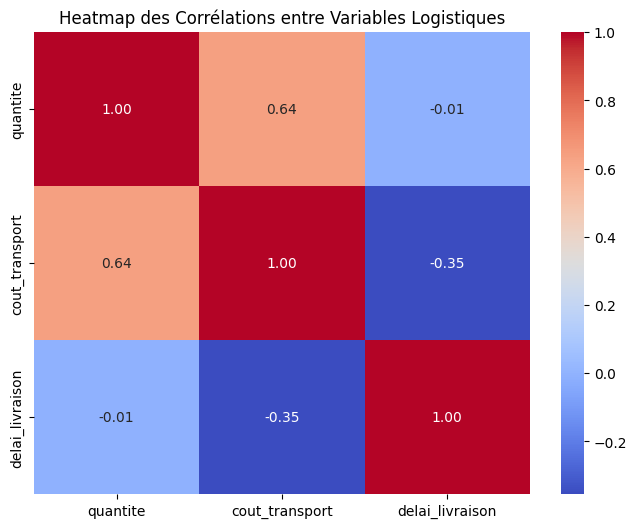

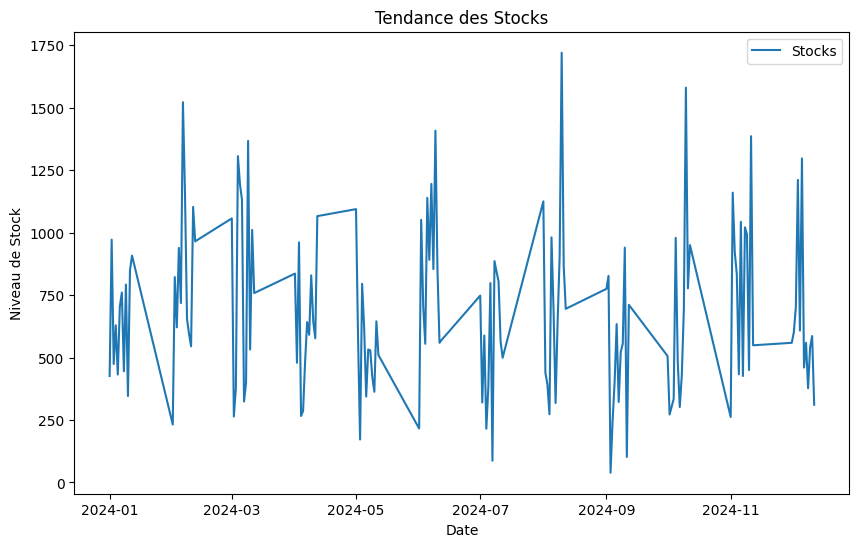

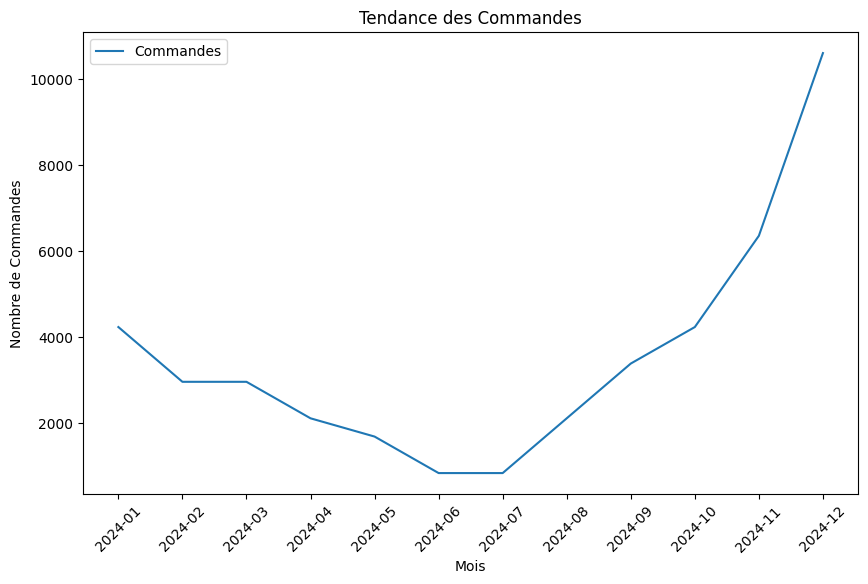

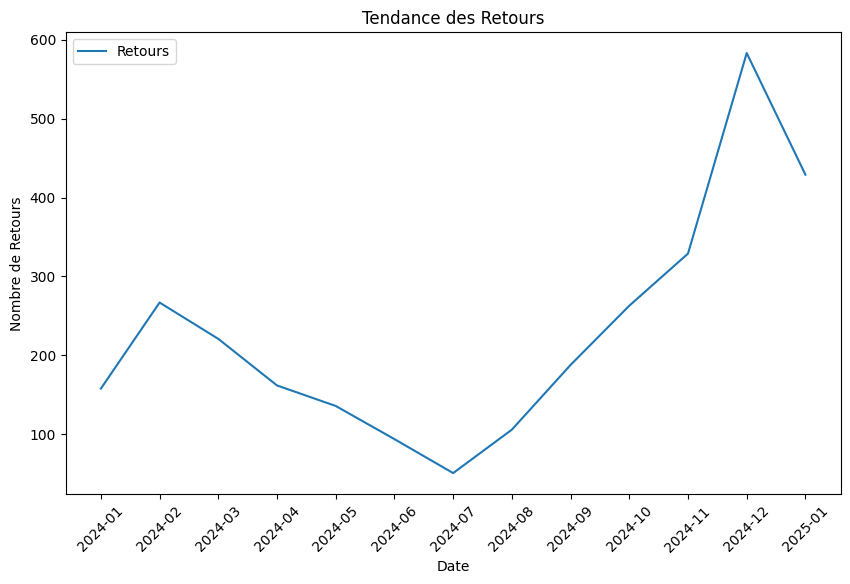

In [ ]:
# Heatmap des corrélations entre variables logistiques
logistics_data = df_expedition[['quantite', 'cout_transport', 'delai_livraison']]
correlation_matrix = logistics_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap des Corrélations entre Variables Logistiques")
plt.show()

# Courbes de tendance pour les stocks, commandes et retours
# Tendance des stocks
stocks_trend = df_stocks.groupby('date')['niveau_stock'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=stocks_trend, x='date', y='niveau_stock', label='Stocks')
plt.title("Tendance des Stocks")
plt.xlabel("Date")
plt.ylabel("Niveau de Stock")
plt.legend()
plt.show()

# Tendance des commandes
commandes_trend = df_commandes.groupby('mois').size().reset_index(name='nombre_commandes')
commandes_trend['mois'] = commandes_trend['mois'].astype(str)
plt.figure(figsize=(10, 6))
sns.lineplot(data=commandes_trend, x='mois', y='nombre_commandes', label='Commandes')
plt.title("Tendance des Commandes")
plt.xlabel("Mois")
plt.ylabel("Nombre de Commandes")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Tendance des retours
df_retours['date_retour'] = pd.to_datetime(df_retours['date_retour'])
retours_trend = df_retours.groupby(df_retours['date_retour'].dt.to_period('M')).size().reset_index(name='nombre_retours')
retours_trend['date_retour'] = retours_trend['date_retour'].astype(str)
plt.figure(figsize=(10, 6))
sns.lineplot(data=retours_trend, x='date_retour', y='nombre_retours', label='Retours')
plt.title("Tendance des Retours")
plt.xlabel("Date")
plt.ylabel("Nombre de Retours")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Répartition des fournisseurs selon leur performance
fournisseurs_performance = df_fournisseurs['segment'].value_counts().reset_index()
fournisseurs_performance.columns = ['segment', 'nombre_fournisseurs']
fig = px.pie(fournisseurs_performance, names='segment', values='nombre_fournisseurs', 
             title="Répartition des Fournisseurs selon leur Performance", template="plotly_white")
fig.update_traces(textinfo='percent+label')
fig.show()

In [ ]:
# Corrélation entre les délais de livraison et les taux de retours
returns_delivery_correlation = df_retours.merge(df_expedition, on='id_commande', how='inner')
correlation_delivery_returns = returns_delivery_correlation.groupby('motif')['delai_livraison'].mean().reset_index()

fig_correlation_returns = px.bar(correlation_delivery_returns, 
                                 x='motif', 
                                 y='delai_livraison', 
                                 title="Corrélation entre les délais de livraison et les taux de retours",
                                 labels={'motif': 'Motif de retour', 'delai_livraison': 'Délai moyen (jours)'},
                                 template="plotly_white")
fig_correlation_returns.update_layout(xaxis=dict(tickangle=45))
fig_correlation_returns.show()

# Corrélation entre les prix d'achat et les volumes commandés
fig_purchase_volume = px.imshow(purchase_volume_correlation, 
                                 text_auto=True, 
                                 title="Corrélation entre les prix d'achat et les volumes commandés",
                                 labels=dict(x="Variables", y="Variables", color="Corrélation"),
                                 x=purchase_volume_correlation.columns,
                                 y=purchase_volume_correlation.index,
                                 template="plotly_white")
fig_purchase_volume.show()

# Identification des points problématiques
# 1. Retards fréquents
frequent_delays_summary = frequent_delays.groupby('id_produit')['delai_livraison_jours'].mean().reset_index()
fig_frequent_delays = px.bar(frequent_delays_summary.head(10), 
                             x='id_produit', 
                             y='delai_livraison_jours', 
                             title="Produits avec des retards fréquents",
                             labels={'id_produit': 'ID Produit', 'delai_livraison_jours': 'Délai moyen (jours)'},
                             template="plotly_white")
fig_frequent_delays.show()

# 2. Stocks insuffisants
fig_insufficient_stocks = px.bar(insufficient_stocks.head(10), 
                                 x='id_produit', 
                                 y='ratio_stock_demande', 
                                 title="Produits avec des stocks insuffisants",
                                 labels={'id_produit': 'ID Produit', 'ratio_stock_demande': 'Ratio Stock/Demande'},
                                 template="plotly_white")
fig_insufficient_stocks.show()

# 3. Produits sous-performants (faible demande)
fig_low_demand_products = px.bar(low_demand_products.head(10), 
                                  x='id_produit', 
                                  y='quantite', 
                                  title="Produits sous-performants (faible demande)",
                                  labels={'id_produit': 'ID Produit', 'quantite': 'Quantité commandée'},
                                  template="plotly_white")
fig_low_demand_products.show()

KeyError: 'id_commande'

In [ ]:
# Indicateurs Produits

# 1. Nombre total de produits
nombre_total_produits = len(produits)
print(f"Nombre total de produits : {nombre_total_produits}")

# 2. Nombre de produits par catégorie
produits_par_categorie = produits['catÃ©gorie'].value_counts().reset_index()
produits_par_categorie.columns = ['categorie', 'nombre_produits']

fig_produits_par_categorie = px.bar(
    produits_par_categorie,
    x='categorie',
    y='nombre_produits',
    title="Répartition des produits par catégorie",
    labels={'categorie': 'Catégorie', 'nombre_produits': 'Nombre de produits'},
    template="plotly_white"
)
fig_produits_par_categorie.show()

# 3. Produits sous le seuil de stock
produits_sous_seuil = produits[produits['stock_minimum'] > produits['prix']]
nombre_produits_sous_seuil = len(produits_sous_seuil)
print(f"Nombre de produits sous le seuil de stock : {nombre_produits_sous_seuil}")

fig_produits_sous_seuil = px.bar(
    produits_sous_seuil,
    x='ï»¿id_produit',
    y='stock_minimum',
    title="Produits sous le seuil de stock",
    labels={'ï»¿id_produit': 'ID Produit', 'stock_minimum': 'Stock Minimum'},
    template="plotly_white"
)
fig_produits_sous_seuil.show()

# 4. Produits à forte valeur
produits_cher = produits.sort_values(by='prix', ascending=False).head(10)
fig_produits_cher = px.bar(
    produits_cher,
    x='ï»¿id_produit',
    y='prix',
    title="Top 10 des produits les plus chers",
    labels={'ï»¿id_produit': 'ID Produit', 'prix': 'Prix (€)'},
    template="plotly_white"
)
fig_produits_cher.show()

# 5. Produits stratégiques (croisement avec retours et ventes)
produits_strategiques = retours['id_produit'].value_counts().reset_index()
produits_strategiques.columns = ['id_produit', 'nombre_retours']
produits_strategiques = produits_strategiques.merge(
    produits[['ï»¿id_produit', 'catÃ©gorie', 'prix']],
    left_on='id_produit',
    right_on='ï»¿id_produit',
    how='left'
)

fig_produits_strategiques = px.scatter(
    produits_strategiques,
    x='prix',
    y='nombre_retours',
    color='catÃ©gorie',
    size='nombre_retours',
    title="Produits stratégiques : Croisement avec retours",
    labels={'prix': 'Prix (€)', 'nombre_retours': 'Nombre de retours', 'catÃ©gorie': 'Catégorie'},
    template="plotly_white"
)
fig_produits_strategiques.show()

Nombre total de produits : 1000


Nombre de produits sous le seuil de stock : 69


In [ ]:
#volume_total_commandes = df_commandes['id_commande'].nunique()
#print(f"Volume total de commandes : {volume_total_commandes}")


# Délai moyen de traitement de commande
df_commandes['date_livraison'] = pd.to_datetime(df_expedition['date_livraison'], errors='coerce')
df_commandes['delai_traitement'] = (df_commandes['date_livraison'] - df_commandes['date_commande']).dt.days
delai_moyen_traitement = df_commandes['delai_traitement'].mean()
print(f"Délai moyen de traitement de commande : {delai_moyen_traitement:.2f} jours")

# Taux de commandes annulées
taux_commandes_annulees = (df_commandes[df_commandes['statut'] == 'annulé'].shape[0] / len(df_commandes)) * 100
print(f"Taux de commandes annulées : {taux_commandes_annulees:.2f}%")

# Taux de commande par produit
commandes_par_produit = df_commandes['id_produit'].value_counts(normalize=True).reset_index()
commandes_par_produit.columns = ['id_produit', 'taux_commandes']
fig_taux_commandes = px.bar(commandes_par_produit.head(10), 
                            x='id_produit', 
                            y='taux_commandes', 
                            title="Taux de commande par produit",
                            labels={'id_produit': 'ID Produit', 'taux_commandes': 'Taux de Commandes'},
                            template="plotly_white")
fig_taux_commandes.show()

# Saison de commande (analyse par mois)
df_commandes['mois'] = df_commandes['date_commande'].dt.month
commandes_par_mois = df_commandes['mois'].value_counts().reset_index()
commandes_par_mois.columns = ['mois', 'nombre_commandes']
fig_saison_commandes = px.bar(commandes_par_mois.sort_values(by='mois'), 
                              x='mois', 
                              y='nombre_commandes', 
                              title="Saison des commandes (par mois)",
                              labels={'mois': 'Mois', 'nombre_commandes': 'Nombre de Commandes'},
                              template="plotly_white")
fig_saison_commandes.show()

Délai moyen de traitement de commande : 7.45 jours
Taux de commandes annulées : 0.00%


In [ ]:
# Délai moyen de livraison
avg_delivery_time = df_expedition.groupby('transporteur')['delai_livraison'].mean().reset_index()
fig_avg_delivery_time = px.bar(
    avg_delivery_time,
    x='transporteur',
    y='delai_livraison',
    title="Délai moyen de livraison par transporteur",
    labels={'transporteur': 'Transporteur', 'delai_livraison': 'Délai moyen (jours)'},
    template="plotly_white"
)
fig_avg_delivery_time.show()

# Coût moyen par expédition
avg_transport_cost = df_expedition.groupby('transporteur')['cout_transport'].mean().reset_index()
fig_avg_transport_cost = px.bar(
    avg_transport_cost,
    x='transporteur',
    y='cout_transport',
    title="Coût moyen par expédition par transporteur",
    labels={'transporteur': 'Transporteur', 'cout_transport': 'Coût moyen (€)'},
    template="plotly_white"
)
fig_avg_transport_cost.show()

# Taux d’expédition en retard
total_expeditions = len(df_expedition)
late_expeditions = len(df_expedition[df_expedition['delai_livraison'] > df_expedition['delai_livraison'].mean()])
late_expedition_rate = (late_expeditions / total_expeditions) * 100
print(f"Taux d’expédition en retard : {late_expedition_rate:.2f}%")

# Volume d’expédition par transporteur
expedition_volume = df_expedition.groupby('transporteur')['quantite'].sum().reset_index()
fig_expedition_volume = px.bar(
    expedition_volume,
    x='transporteur',
    y='quantite',
    title="Volume d’expédition par transporteur",
    labels={'transporteur': 'Transporteur', 'quantite': 'Volume d’expédition'},
    template="plotly_white"
)
fig_expedition_volume.show()

Taux d’expédition en retard : 52.68%


In [ ]:
# Calcul des indicateurs pour le fichier stocks.csv

# 1. Taux de couverture stock (en jours)
# Calcul du taux de couverture stock en jours
df_stocks['taux_couverture'] = df_stocks['niveau_stock'] / df_commandes.groupby('id_produit')['quantite'].transform('mean')

# Visualisation du taux de couverture stock
taux_couverture = df_stocks.groupby('id_produit')['taux_couverture'].mean().reset_index()
fig_taux_couverture = px.bar(
    taux_couverture.head(10),
    x='id_produit',
    y='taux_couverture',
    title="Taux de Couverture Stock (en jours)",
    labels={'id_produit': 'ID Produit', 'taux_couverture': 'Taux de Couverture (jours)'},
    template="plotly_white"
)
fig_taux_couverture.show()

# 2. Taux de rupture (% de produits à 0 en stock)
# Calcul du taux de rupture
df_stocks['rupture'] = df_stocks['niveau_stock'] == 0
taux_rupture = df_stocks.groupby('id_produit')['rupture'].mean().reset_index()
taux_rupture['rupture'] *= 100  # Convertir en pourcentage
print(taux_rupture.head())

# Visualisation du taux de rupture
fig_taux_rupture = px.bar(
    taux_rupture.head(10),
    x='id_produit',
    y='rupture',
    title="Taux de Rupture de Stock",
    labels={'id_produit': 'ID Produit', 'rupture': 'Taux de Rupture (%)'},
    template="plotly_white"
)
fig_taux_rupture.show()

# 3. Rotation de stock (vitesse de renouvellement)
# Merge stocks and commandes tables
merged_data = pd.merge(df_stocks, df_commandes, on='id_produit', how='inner')
rotation_stock = merged_data.groupby('id_produit')['niveau_stock'].sum() / merged_data.groupby('id_produit')['quantite'].sum()
rotation_stock = rotation_stock.reset_index(name='rotation_stock')

# Visualisation de la rotation de stock
fig_rotation_stock = px.bar(
    rotation_stock.head(10),
    x='id_produit',
    y='rotation_stock',
    title="Rotation de Stock",
    labels={'id_produit': 'ID Produit', 'rotation_stock': 'Rotation de Stock'},
    template="plotly_white"
)
fig_rotation_stock.show()

# 4. Stock moyen par produit
stock_moyen = stocks.groupby('id_produit')['niveau_stock'].mean().reset_index()

# Visualisation du stock moyen par produit
fig_stock_moyen = px.bar(
    stock_moyen.head(10),
    x='id_produit',
    y='niveau_stock',
    title="Stock Moyen par Produit",
    labels={'id_produit': 'ID Produit', 'niveau_stock': 'Stock Moyen'},
    template="plotly_white"
)
fig_stock_moyen.show()

  id_produit  rupture
0     P00001      0.0
1     P00002      0.0
2     P00003      0.0
3     P00004      0.0
4     P00005      0.0


In [ ]:
# Volume total d’achat par produit et par fournisseur
volume_achat_produit = df_achat.groupby('id_produit')['quantite'].sum().reset_index()
volume_achat_produit.columns = ['id_produit', 'volume_total']
fig_volume_produit = px.bar(
    volume_achat_produit.head(10),
    x='id_produit',
    y='volume_total',
    title="Volume Total d'Achat par Produit",
    labels={'id_produit': 'ID Produit', 'volume_total': 'Volume Total'},
    template="plotly_white"
)
fig_volume_produit.show()

volume_achat_fournisseur = df_achat.groupby('id_fournisseur')['quantite'].sum().reset_index()
volume_achat_fournisseur.columns = ['id_fournisseur', 'volume_total']
fig_volume_fournisseur = px.bar(
    volume_achat_fournisseur.head(10),
    x='id_fournisseur',
    y='volume_total',
    title="Volume Total d'Achat par Fournisseur",
    labels={'id_fournisseur': 'ID Fournisseur', 'volume_total': 'Volume Total'},
    template="plotly_white"
)
fig_volume_fournisseur.show()

# Prix moyen d’achat par produit
prix_moyen_produit = df_achat.groupby('id_produit')['prix_unitaire'].mean().reset_index()
prix_moyen_produit.columns = ['id_produit', 'prix_moyen']
fig_prix_moyen_produit = px.bar(
    prix_moyen_produit.head(10),
    x='id_produit',
    y='prix_moyen',
    title="Prix Moyen d'Achat par Produit",
    labels={'id_produit': 'ID Produit', 'prix_moyen': 'Prix Moyen (€)'},
    template="plotly_white"
)
fig_prix_moyen_produit.show()

# Comparaison des fournisseurs (prix moyen)
prix_moyen_fournisseur = df_achat.groupby('id_fournisseur')['prix_unitaire'].mean().reset_index()
prix_moyen_fournisseur.columns = ['id_fournisseur', 'prix_moyen']
fig_prix_moyen_fournisseur = px.bar(
    prix_moyen_fournisseur.head(10),
    x='id_fournisseur',
    y='prix_moyen',
    title="Prix Moyen d'Achat par Fournisseur",
    labels={'id_fournisseur': 'ID Fournisseur', 'prix_moyen': 'Prix Moyen (€)'},
    template="plotly_white"
)
fig_prix_moyen_fournisseur.show()

# Délai moyen de livraison des achats
delai_moyen_livraison = df_achat.groupby('id_fournisseur')['delai_livraison_jours'].mean().reset_index()
delai_moyen_livraison.columns = ['id_fournisseur', 'delai_moyen']
fig_delai_moyen = px.bar(
    delai_moyen_livraison.head(10),
    x='id_fournisseur',
    y='delai_moyen',
    title="Délai Moyen de Livraison par Fournisseur",
    labels={'id_fournisseur': 'ID Fournisseur', 'delai_moyen': 'Délai Moyen (jours)'},
    template="plotly_white"
)
fig_delai_moyen.show()

# Fréquence des achats par produit
frequence_achat_produit = df_achat.groupby('id_produit').size().reset_index(name='frequence')
fig_frequence_produit = px.bar(
    frequence_achat_produit.head(10),
    x='id_produit',
    y='frequence',
    title="Fréquence des Achats par Produit",
    labels={'id_produit': 'ID Produit', 'frequence': 'Fréquence'},
    template="plotly_white"
)
fig_frequence_produit.show()

In [ ]:
# 1. Taux de retour global

total_retours = len(df_retours)
total_commandes = len(df_commandes)
taux_retour_global = (total_retours / total_commandes) * 100
print(f"Taux de retour global : {taux_retour_global:.2f}%")

# 2. Taux de retour par produit
retours_par_produit = df_retours['id_produit'].value_counts(normalize=True).reset_index()
retours_par_produit.columns = ['id_produit', 'taux_retour']
fig_taux_retour_produit = px.bar(
    retours_par_produit.head(10),
    x='id_produit',
    y='taux_retour',
    title="Taux de Retour par Produit",
    labels={'id_produit': 'ID Produit', 'taux_retour': 'Taux de Retour (%)'},
    template="plotly_white"
)
fig_taux_retour_produit.show()

# 3. Motifs de retour les plus fréquents
motifs_retours = df_retours['motif'].value_counts().reset_index()
motifs_retours.columns = ['motif', 'nombre_retours']
fig_motifs_retours = px.pie(
    motifs_retours,
    names='motif',
    values='nombre_retours',
    title="Motifs de Retour les Plus Fréquents",
    template="plotly_white"
)
fig_motifs_retours.update_traces(textinfo='percent+label')
fig_motifs_retours.show()

# 4. Temps de traitement des retours
df_retours['date_retour'] = pd.to_datetime(df_retours['date_retour'])
df_expedition['date_livraison'] = pd.to_datetime(df_expedition['date_livraison'])
retours_traitement = df_retours.merge(df_expedition, on='id_commande', how='inner')
retours_traitement['temps_traitement'] = (retours_traitement['date_retour'] - retours_traitement['date_livraison']).dt.days
temps_traitement_moyen = retours_traitement['temps_traitement'].mean()
print(f"Temps moyen de traitement des retours : {temps_traitement_moyen:.2f} jours")

fig_temps_traitement = px.histogram(
    retours_traitement,
    x='temps_traitement',
    nbins=30,
    title="Distribution du Temps de Traitement des Retours",
    labels={'temps_traitement': 'Temps de Traitement (jours)'},
    template="plotly_white"
)
fig_temps_traitement.update_layout(xaxis_title="Temps de Traitement (jours)", yaxis_title="Nombre de Retours")
fig_temps_traitement.show()

Taux de retour global : 7.04%


KeyError: 'id_commande'

In [ ]:
# 1. HHI - Indice de Herfindahl-Hirschman
def calculate_hhi(data, column):
    shares = data[column] / data[column].sum()
    hhi = (shares ** 2).sum() * 10000
    return hhi

# HHI pour les fournisseurs
hhi_fournisseurs = calculate_hhi(volume_achat_fournisseur, 'volume_total')
print(f"HHI Fournisseurs : {hhi_fournisseurs:.2f}")

# HHI pour les produits commandés
hhi_produits_commandes = calculate_hhi(volume_achat_produit, 'volume_total')
print(f"HHI Produits Commandés : {hhi_produits_commandes:.2f}")

# HHI pour les produits retournés
hhi_produits_retournes = calculate_hhi(retours_par_produit, 'taux_retour')
print(f"HHI Produits Retournés : {hhi_produits_retournes:.2f}")

# 2. OTIF - On-Time In Full
otif = (len(df_expedition[(df_expedition['delai_livraison'] <= df_expedition['delai_livraison'].mean()) & 
                          (df_expedition['quantite'] > 0)]) / len(df_expedition)) * 100
print(f"OTIF : {otif:.2f}%")

# 3. Taux de retour
taux_retour = (total_retours / total_commandes) * 100
print(f"Taux de Retour : {taux_retour:.2f}%")

# 4. Délai moyen d'expédition
delai_moyen_expedition = df_expedition['delai_livraison'].mean()
print(f"Délai Moyen d'Expédition : {delai_moyen_expedition:.2f} jours")

# 5. Rotation moyenne des stocks
rotation_moyenne_stocks = rotation_stock['rotation_stock'].mean()
print(f"Rotation Moyenne des Stocks : {rotation_moyenne_stocks:.2f}")

# 6. Coût logistique unitaire
cout_logistique_unitaire = logistics_data['cout_transport'].sum() / logistics_data['quantite'].sum()
print(f"Coût Logistique Unitaire : {cout_logistique_unitaire:.2f} €")

HHI Fournisseurs : 1301.51
HHI Produits Commandés : 12.00
HHI Produits Retournés : 56.94
OTIF : 47.32%
Taux de Retour : 7.04%
Délai Moyen d'Expédition : 3.72 jours
Rotation Moyenne des Stocks : 32.97
Coût Logistique Unitaire : 3.06 €


In [ ]:
# Corrélation entre délais de livraison et taux de retours
returns_delivery_correlation = df_retours.merge(df_expedition, on='id_commande', how='inner')
correlation_delivery_returns = returns_delivery_correlation[['delai_livraison', 'quantite']].corr()
print("Corrélation entre délais de livraison et taux de retours:")
print(correlation_delivery_returns)

# Corrélation entre prix d’achat et volume commandé
correlation_purchase_volume = df_achat[['prix_unitaire', 'quantite']].corr()
print("\nCorrélation entre prix d’achat et volume commandé:")
print(correlation_purchase_volume)

# Corrélation entre fiabilité des fournisseurs et délais moyens
correlation_fournisseurs = df_fournisseurs[['fiabilite', 'delai_moyen_jours']].corr()
print("\nCorrélation entre fiabilité des fournisseurs et délais moyens:")
print(correlation_fournisseurs)

# Corrélation entre niveau de stock et demande
correlation_stock_demande = stock_demande[['niveau_stock', 'quantite']].corr()
print("\nCorrélation entre niveau de stock et demande:")
print(correlation_stock_demande)

# Corrélation entre coûts de transport et délais de livraison
correlation_transport = df_expedition[['cout_transport', 'delai_livraison']].corr()
print("\nCorrélation entre coûts de transport et délais de livraison:")
print(correlation_transport)

# Corrélation entre rotation des stocks et taux de couverture
correlation_rotation_couverture = rotation_stock.merge(taux_couverture, on='id_produit', how='inner')
correlation_rotation_couverture = correlation_rotation_couverture[['rotation_stock', 'taux_couverture']].corr()
print("\nCorrélation entre rotation des stocks et taux de couverture:")
print(correlation_rotation_couverture)

# Corrélation entre taux de rupture et taux de retours
correlation_rupture_retours = taux_rupture.merge(retours_par_produit, on='id_produit', how='inner')
correlation_rupture_retours = correlation_rupture_retours[['rupture', 'taux_retour']].corr()
print("\nCorrélation entre taux de rupture et taux de retours:")
print(correlation_rupture_retours)

KeyError: 'id_commande'

In [ ]:
from fbprophet import Prophet

# Prepare data for time series forecasting
demand_data = df_commandes.groupby('date_commande')['quantite'].sum().reset_index()
demand_data.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet()
model.fit(demand_data)

# Create a dataframe for future dates
future = model.make_future_dataframe(periods=30)  # Predict for the next 30 days
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)

### Prediction de la demande 

In [ ]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

def test_stationarity(timeseries):
    """
    Effectue le test de Dickey-Fuller augmenté pour vérifier la stationnarité.
    """
    print("Résultats du test de Dickey-Fuller augmenté :")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Exemple : tester la stationnarité de la demande pour le premier produit
produit_id = demande_par_mois['id_produit'].unique()[0]
demande_produit = demande_par_mois[demande_par_mois['id_produit'] == produit_id]['Demande']
test_stationarity(demande_produit)

# Si la série n'est pas stationnaire, différencier
if adfuller(demande_produit, autolag='AIC')[1] > 0.05:
    demande_produit_diff = demande_produit.diff().dropna()
    print("\nSérie différenciée (1 fois) :")
    test_stationarity(demande_produit_diff)
    plt.plot(demande_produit_diff)
    plt.title("Demande différenciée")
    plt.show()
else:
    demande_produit_diff = demande_produit

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Tracer ACF et PACF pour la série différenciée
plot_acf(demande_produit_diff, title="ACF de la demande différenciée")
plot_pacf(demande_produit_diff, title="PACF de la demande différenciée")
plt.show()

In [ ]:
# Séparation en ensembles d'entraînement et de test
periode_test_debut = demande_par_mois['Mois'].max() - pd.DateOffset(months=6)  # 6 derniers mois pour le test
train = demande_par_mois[demande_par_mois['Mois'] < periode_test_debut]
test = demande_par_mois[demande_par_mois['Mois'] >= periode_test_debut]

# Sélectionner un produit spécifique pour la démonstration
produit_id = demande_par_mois['id_produit'].unique()[0]
train_produit = train[train['id_produit'] == produit_id]['Demande']
test_produit = test[test['id_produit'] == produit_id]['Demande']

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Entraîner le modèle ARIMA
p, d, q = 1, 1, 1  
model = ARIMA(train_produit, order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Faire des prédictions
predictions = model_fit.forecast(steps=len(test_produit))

# Évaluer les performances
mae = mean_absolute_error(test_produit, predictions)
rmse = np.sqrt(mean_squared_error(test_produit, predictions))
mape = mean_absolute_percentage_error(test_produit, predictions)
print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}")

# Visualiser les résultats
plt.figure(figsize=(12, 6))
plt.plot(train_produit, label='Entraînement', marker='o')
plt.plot(test_produit.index, test_produit, label='Test', marker='o')
plt.plot(test_produit.index, predictions, label='Prédictions', marker='x')
plt.xlabel('Période')
plt.ylabel('Demande')
plt.title(f'Prévision de la demande pour le produit {produit_id}')
plt.legend()
plt.show()